TIC TAC TOE DATASET

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture


In [ ]:
# Import dataset
dataset = pd.read_csv('tic-tac-toe.csv')
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      958 non-null    int64 
 1   'top-left-square'       958 non-null    object
 2   'top-middle-square'     958 non-null    object
 3   'top-right-square'      958 non-null    object
 4   'middle-left-square'    958 non-null    object
 5   'middle-middle-square'  958 non-null    object
 6   'middle-right-square'   958 non-null    object
 7   'bottom-left-square'    958 non-null    object
 8   'bottom-middle-square'  958 non-null    object
 9   'bottom-right-square'   958 non-null    object
 10  'Class'                 958 non-null    object
dtypes: int64(1), object(10)
memory usage: 82.5+ KB


In [ ]:
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9:10].values

In [ ]:
le = LabelEncoder()
for col in dataset.columns:
    dataset[col] = le.fit_transform(dataset[col])

X=dataset.iloc[:,:-1].values

# Onehot encode all dependent categorical variables
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()


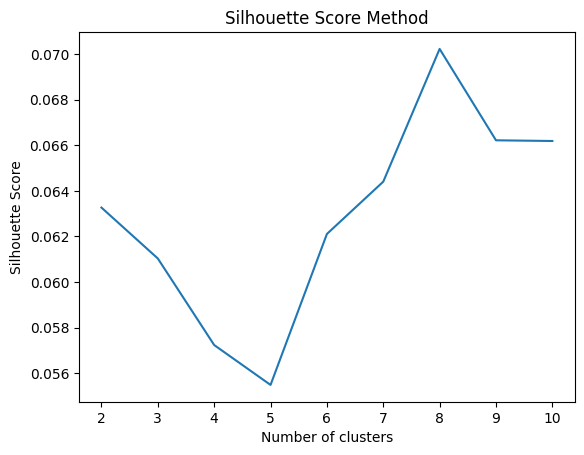

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    gm = GaussianMixture(n_components=k, random_state=42)
    labels = gm.fit(X).predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette Score graph
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

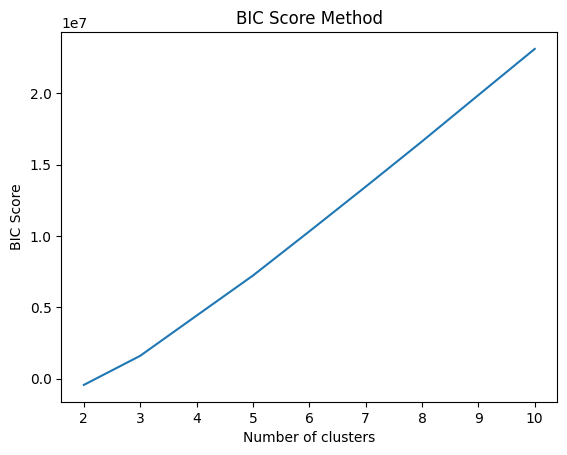

In [ ]:

bic_scores = []

for k in range(2, 11):
    gm = GaussianMixture(n_components=k, random_state=42)
    labels = gm.fit(X).predict(X)
    bic_scores.append(gm.bic(X))

# Plot the Silhouette Score graph
plt.plot(range(2, 11), bic_scores)
plt.title('BIC Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')
plt.show()

In [ ]:
gm = GaussianMixture(n_components=5, random_state=42)
label = gm.fit(X).predict(X)


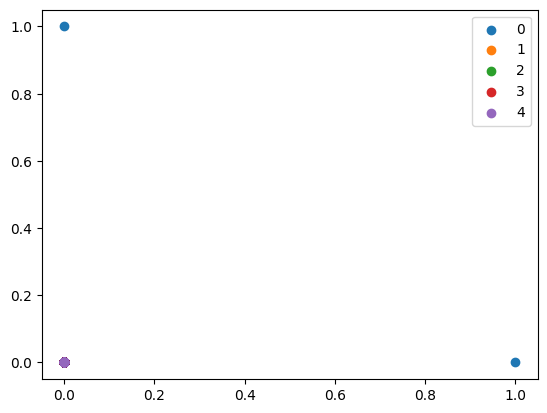

In [ ]:
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
gm = GaussianMixture(n_components=2, random_state=42)
label = gm.fit(X).predict(X)

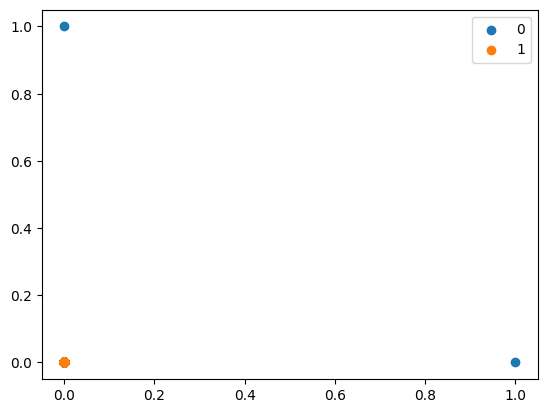

In [ ]:
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

CAR EVALUATION DATASET

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

dataset = pd.read_csv('car_evaluation.csv', names=col_names)

X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: >

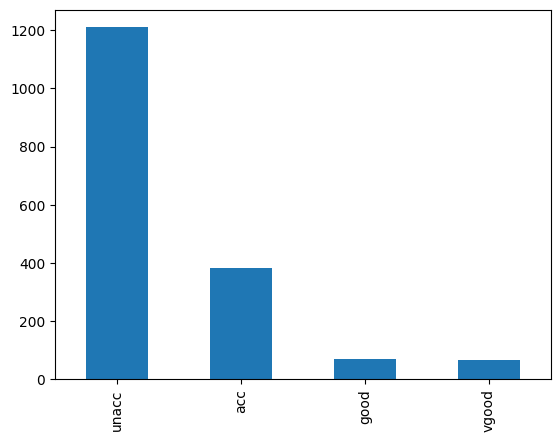

In [ ]:
dataset['class'].value_counts().plot(kind="bar")

In [ ]:
feature_names = list(dataset.columns.values[:-1])
for feature in feature_names:
    unique_count = dataset[feature].nunique()
    unique_vals = dataset[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [ ]:
label_name = dataset.columns.values[-1]
print("{}: {} values, {}".format(label_name, dataset[label_name].nunique(), dataset[label_name].unique()))
dataset[label_name].value_counts()


class: 4 values, ['unacc' 'acc' 'vgood' 'good']


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
dataset=dataset.iloc[:,:-1]
dataset.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
print(dataset['buying'])

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1728, dtype: object


In [ ]:
label_encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

scaler = StandardScaler()
data_encoded = scaler.fit_transform(dataset)


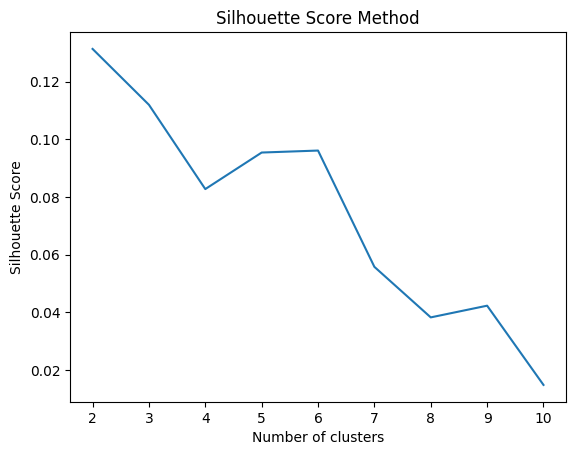

In [ ]:
from sklearn.metrics import silhouette_score
X=data_encoded
silhouette_scores = []

for k in range(2, 11):
    gm = GaussianMixture(n_components=k, random_state=42)
    labels = gm.fit(X).predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette Score graph
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

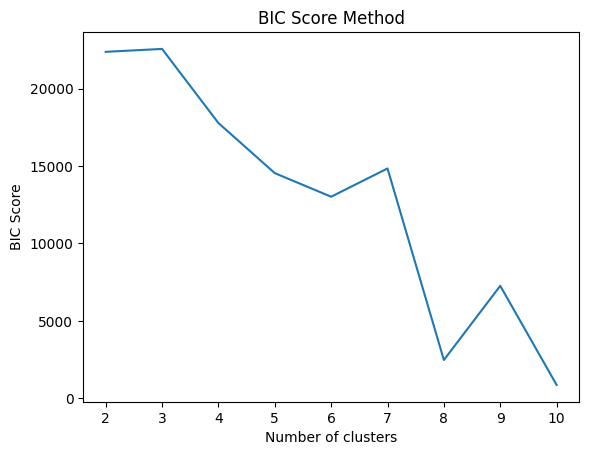

In [ ]:
bic_scores = []

for k in range(2, 11):
    gm = GaussianMixture(n_components=k, random_state=42)
    labels = gm.fit(X).predict(X)
    bic_scores.append(gm.bic(X))

# Plot the Silhouette Score graph
plt.plot(range(2, 11), bic_scores)
plt.title('BIC Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')
plt.show()

In [ ]:
gm = GaussianMixture(n_components=10, random_state=42)
label = gm.fit(X).predict(X)


[1 5 4 ... 2 0 7]


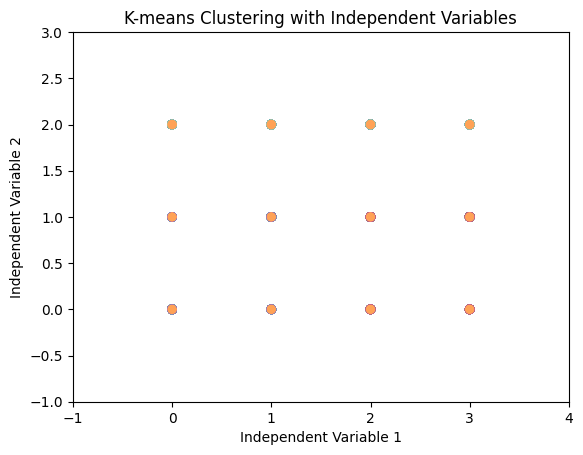

In [ ]:
a = dataset['buying']
b = dataset['lug_boot']
cluster_labels = label  # Assuming you have the cluster labels from K-means
print(cluster_labels)
plt.scatter(a, b, c=cluster_labels, cmap='rainbow')
plt.xlim(-1, 4)  # Adjust the x-axis limits
plt.ylim(-1, 3)
plt.xlabel('Independent Variable 1')
plt.ylabel('Independent Variable 2')
plt.title('EM Clustering with Independent Variables')
plt.show()